In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib
from matplotlib import pylab as plt


import pandas as pd
from sklearn.model_selection import train_test_split 


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Data/data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.head(10) # by default, shows the first five rows but check help(df.head) to specify the number of rows to show


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
df.shape # the shape of dataframe (number of rows, number of columns)

(303, 14)

In [7]:
df.shape[0]# number of rows

303

In [8]:
df.shape[1]# number of columns

14

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [12]:
df[(df['chol']>200)&(df['age']<35)].head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


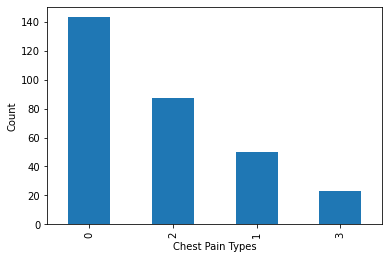

In [14]:
pd.value_counts(df['cp']).plot.bar()
plt.ylabel('Count')
plt.xlabel('Chest Pain Types')
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Figures/Fig1.png')
plt.show()

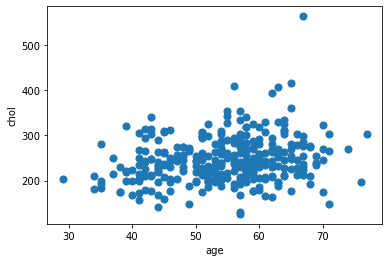

In [15]:
df.plot.scatter('age','chol',alpha=1,s=50)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Figures/Fig2.png')
plt.show()

In [16]:
count_matrix = df.groupby(['target', 'sex']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

sex            0         1
target                    
0       0.173913  0.826087
1       0.436364  0.563636


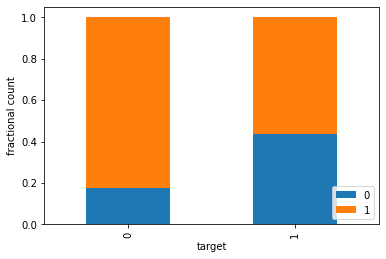

In [17]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fractional count')
plt.legend(loc=4)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Figures/Fig3.png')
plt.show()

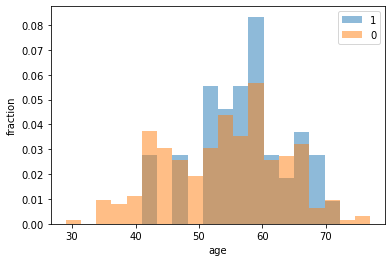

In [18]:
import matplotlib
from matplotlib import pylab as plt

categories = df['fbs'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['fbs']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('age')
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Figures/Fig4.png')
plt.show()

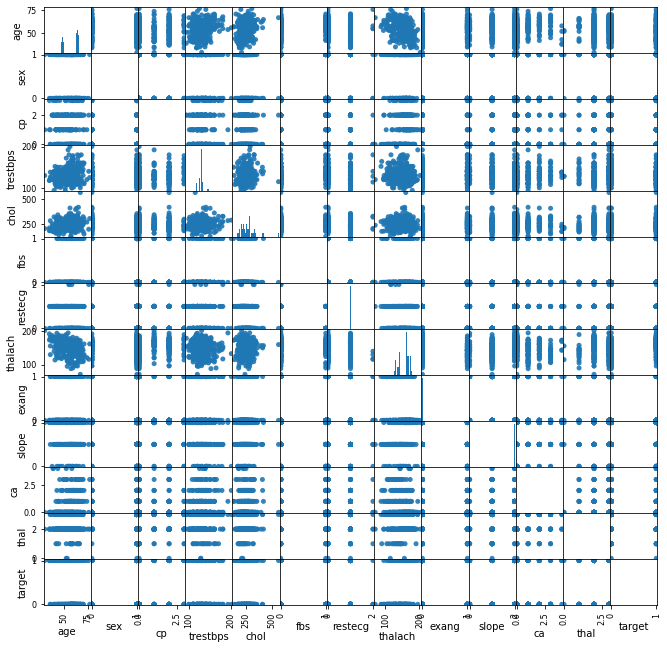

In [19]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(11, 11),hist_kwds={'bins': 300}, 
                           s=100, alpha=0.9)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Figures/Fig5.png')
plt.show()

In [20]:
y = df['target'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'target'] # all other columns are features
print(y)
print(X.head())

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [21]:
random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.head())

training set: (181, 13) (181,)
(122, 13) (122,)
validation set: (61, 13) (61,)
test set: (61, 13) (61,)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
288   57    1   0       110   335    0        1      143      1      3.0   
170   56    1   2       130   256    1        0      142      1      0.6   
234   70    1   0       130   322    0        0      109      0      2.4   
211   61    1   0       120   260    0        1      140      1      3.6   
55    52    1   1       134   201    0        1      158      0      0.8   

     slope  ca  thal  
288      1   1     3  
170      1   1     1  
234      1   3     2  
211      1   1     3  
55       2   1     2  


In [22]:
onehot_ftrs = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names(onehot_ftrs))
print(len(enc.get_feature_names(onehot_ftrs)))

feature names: ['sex_0' 'sex_1' 'cp_0' 'cp_1' 'cp_2' 'cp_3' 'fbs_0' 'fbs_1' 'restecg_0'
 'restecg_1' 'restecg_2' 'exang_0' 'exang_1' 'slope_0' 'slope_1' 'slope_2'
 'ca_0' 'ca_1' 'ca_2' 'ca_3' 'thal_0' 'thal_1' 'thal_2' 'thal_3']
24


In [23]:
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
print(onehot_test)

transformed train features:
[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]
transformed val features:
[[0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
transformed test features:
[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [24]:
minmax_ftrs = ['age','trestbps','chol','thalach','oldpeak']

scaler = MinMaxScaler()
scaler.fit(X_train[minmax_ftrs])
X_train_scalar = scaler.transform(X_train[minmax_ftrs])
X_val_scalar = scaler.transform(X_val[minmax_ftrs])
X_test_scalar = scaler.transform(X_test[minmax_ftrs])
print(X_train_scalar)
print(X_val_scalar) 
print(X_test_scalar)

[[0.53488372 0.16326531 0.47113164 0.51401869 0.53571429]
 [0.51162791 0.36734694 0.2886836  0.5046729  0.10714286]
 [0.8372093  0.36734694 0.44110855 0.19626168 0.42857143]
 [0.62790698 0.26530612 0.29792148 0.48598131 0.64285714]
 [0.41860465 0.40816327 0.16166282 0.65420561 0.14285714]
 [0.60465116 0.36734694 0.2817552  0.52336449 0.25      ]
 [0.53488372 0.46938776 0.25404157 0.3271028  0.03571429]
 [0.53488372 0.34693878 0.22632794 0.57943925 0.07142857]
 [0.93023256 0.26530612 0.3187067  0.30841121 0.03571429]
 [0.72093023 0.62244898 0.3187067  0.56074766 0.14285714]
 [0.02325581 0.32653061 0.34872979 0.63551402 0.        ]
 [0.55813953 0.3877551  0.2147806  0.79439252 0.57142857]
 [0.39534884 0.26530612 0.37875289 0.64485981 0.10714286]
 [0.69767442 0.46938776 0.42032333 0.42056075 0.03571429]
 [0.55813953 0.26530612 0.35334873 0.6728972  0.32142857]
 [0.51162791 0.26530612 0.14318707 0.69158879 0.33928571]
 [0.18604651 0.42857143 0.42494226 0.34579439 0.32142857]
 [0.30232558 0

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
